# Google Stock Price - Predict with RNN

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

## Dataset and Pre Processing

In [2]:
# Importing the training set
def get_train_set(filePath):
    dataset_train = pd.read_csv(filePath)
    training_set = dataset_train.iloc[:, 1:2].values
    return training_set

# Feature Scaling
def get_training_set_scaled(training_set):
    sc = MinMaxScaler(feature_range = (0, 1))
    training_set_scaled = sc.fit_transform(training_set)
    return training_set_scaled

# Creating a data structure with X timesteps and 1 output
def get_xtrain_ytrain(steps, training_set_scaled):
    X_train = []
    y_train = []
    max_range = len(training_set_scaled)
    for i in range(steps, max_range):
        X_train.append(training_set_scaled[i-steps:i, 0])
        y_train.append(training_set_scaled[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    return X_train, y_train

# Reshaping
def reashape_xtrain(X_train):
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    return X_train

# get x train y train
def get_prepocessed_xtrain_ytrain(filePath):
    training_set = get_train_set(filePath)
    training_set_scaled = get_training_set_scaled(training_set)
    X_train, y_train = get_xtrain_ytrain(60, training_set_scaled)
    X_train = reashape_xtrain(X_train)
    return X_train , y_train

In [3]:
X_train, y_train = get_prepocessed_xtrain_ytrain('Google_Stock_Price_Train.csv')

## Building and Training the RNN

### Initialising the RNN

In [4]:
regressor = Sequential()

### Adding the first LSTM layer and Dropout regularisation

In [5]:
def add_layers(regressor, shape, layers=2, units = 50):
    for i in range(layers):
        is_first = i == 0
        is_last = i == (layers -1)
        if (is_first):
            regressor.add(LSTM(units = units, return_sequences = True, input_shape = shape))
            regressor.add(Dropout(0.2))
            continue
        if (is_last):
            regressor.add(LSTM(units = units))
            regressor.add(Dropout(0.2))
            continue
        regressor.add(LSTM(units = units, return_sequences = True))
        regressor.add(Dropout(0.2))
    regressor.add(Dense(units = 1))
    return regressor

In [6]:
regressor = add_layers(regressor, (X_train.shape[1], 1), 4, 50)

### Compiling the RNN

In [7]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [8]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0368
Epoch 2/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0061
Epoch 3/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0052
Epoch 4/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0056
Epoch 7/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0052
Epoch 8/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0043
Epoch 9/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0047
Epoch 10/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0040
Epoch 11/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 3s 74ms/step - loss: 0.0043
Epoch 13/100
38/38 [=====

## Making the predictions and visualising the results

### Getting the real stock price of 2017

In [14]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [18]:
training_set = dataset_train.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
sc.fit_transform(training_set)

dataset_full = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_full[len(dataset_full) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

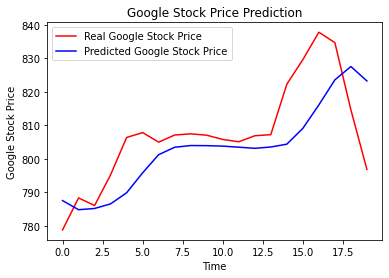

In [19]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()